## Data Analysis: EDA Report

[**Dataset**]( https://archive.ics.uci.edu/ml/datasets/heart+Disease)    

### ETL

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
processed_basel_path = "./data/processed_swiss.csv"
processed_swiss_df = pd.read_csv(processed_basel_path).replace('?', np.nan)

In [3]:
processed_swiss_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num_label
0,32,1,1,95,0,NaN,0,127,0,.7,1,NaN,NaN,1
1,34,1,4,115,0,NaN,NaN,154,0,.2,1,NaN,NaN,1
2,35,1,4,NaN,0,NaN,0,130,1,NaN,NaN,NaN,7,3
3,36,1,4,110,0,NaN,0,125,1,1,2,NaN,6,1
4,38,0,4,105,0,NaN,0,166,0,2.8,1,NaN,NaN,2


In [4]:
processed_swiss_df.dtypes

age           int64
sex           int64
cp            int64
trestbps     object
chol          int64
fbs          object
restecg      object
thalach      object
exang        object
oldpeak      object
slope        object
ca           object
thal         object
num_label     int64
dtype: object

In [3]:
# Missing values
def check_null_values(df):
    null_df = pd.DataFrame({'columns': df.columns, 
                            'percent_null': df.isnull().sum() * 100 / len(df), 
                           'percent_zero': df.isin([0]).sum() * 100 / len(df)
                           } )
    return null_df 

In [4]:
null_df = check_null_values(processed_swiss_df)
null_df

,columns,percent_null,percent_zero
age,age,0.000000,0.000000
sex,sex,0.000000,8.130081
cp,cp,0.000000,0.000000
trestbps,trestbps,1.626016,0.000000
chol,chol,0.000000,100.000000
fbs,fbs,60.975610,0.000000
restecg,restecg,0.813008,0.000000
thalach,thalach,0.813008,0.000000
exang,exang,0.813008,0.000000
oldpeak,oldpeak,4.878049,0.000000


###  Value Distributions

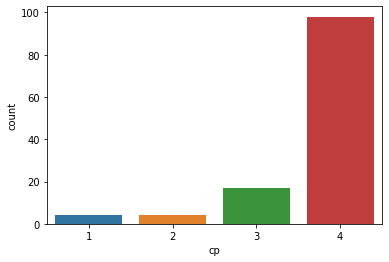

In [5]:
# this another function for histogram for value counts
sns.countplot(processed_swiss_df['cp'])


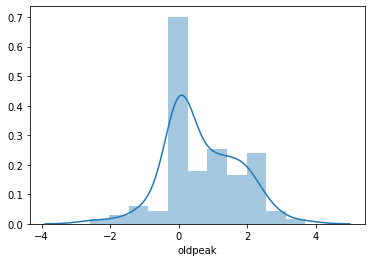

In [6]:
sns.distplot(processed_swiss_df['oldpeak'])

###  Outliers

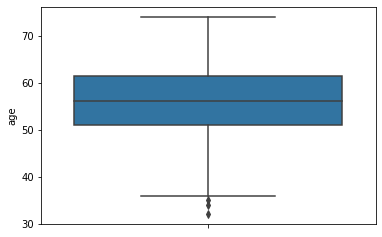

In [9]:
sns.boxplot(y=processed_swiss_df['age'])

### Analyzing a Dataset for High Cardinality

In [7]:
def create_cardinality_feature(df):
    num_rows = len(df)
    random_code_list = np.arange(100, 1000, 1)
    return np.random.choice(random_code_list, num_rows)

new_df = processed_swiss_df.copy()
new_df['principal_diagnosis_code'] = create_cardinality_feature(new_df)

In [8]:
categorical_feature_list = [ 'sex', 'cp', 'restecg', 'exang', 'slope', 'ca', 'thal', 'principal_diagnosis_code']

In [9]:
def count_unique_values(df, cat_col_list):
    cat_df = df[cat_col_list]
    val_df = pd.DataFrame({'columns': cat_df.columns, 
                       'cardinality': cat_df.nunique() } )
    return val_df

In [11]:
val_df = count_unique_values(new_df, categorical_feature_list) 
val_df

,columns,cardinality
sex,sex,2
cp,cp,4
restecg,restecg,3
exang,exang,2
slope,slope,3
ca,ca,2
thal,thal,3
principal_diagnosis_code,principal_diagnosis_code,115


### Preprocessing - Analyze different age groups

In [13]:
# subset dataset
subset_df = processed_swiss_df[processed_swiss_df['num_label'].isin([0, 1])]
subset_df['sex'] = subset_df['sex'].replace({1:"male", 0:"female"})
subset_df['num_label'] = subset_df['num_label'].replace({1:"Positive Label: Diameter Narrowing", 0:"Negative Label: Less Diameter Narrowing"})
demo_features = ['sex',  'age', 'num_label' ]
demo_df = subset_df[demo_features]

#convert age to bins
age_bins = [0, 18, 25, 39,  54, 65, 90]
a_bin = [str(x) for x in age_bins ]
age_labels = ["".join(x) for x in zip( [x + " - " for x in a_bin[:-1]], a_bin[1:])]
demo_df['age_bins'] = pd.cut(demo_df['age'], bins=age_bins, labels=age_labels)

D:\Program\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Program\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
D:\Program\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [14]:
demo_df.head()

,sex,age,num_label,age_bins
0,male,32,Positive Label: Diameter Narrowing,25 - 39
1,male,34,Positive Label: Diameter Narrowing,25 - 39
3,male,36,Positive Label: Diameter Narrowing,25 - 39
5,female,38,Positive Label: Diameter Narrowing,25 - 39
6,male,38,Negative Label: Less Diameter Narrowing,25 - 39


### Age Bin Grouping

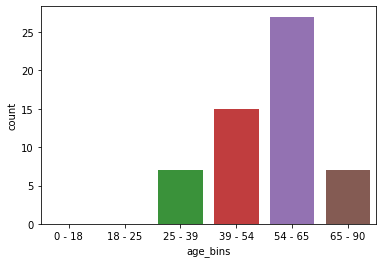

In [15]:
ax = sns.countplot(x="age_bins", data=demo_df)

### Age Bin and Gender Grouping

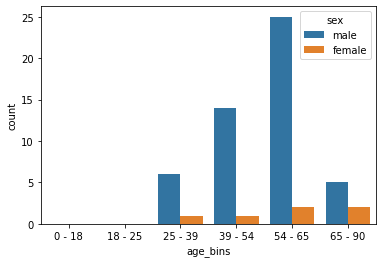

In [16]:
ax = sns.countplot(x="age_bins", hue="sex", data=demo_df)

### Age Bin and Gender Grouping Stratified by Heart Disease Condition (predictor label)

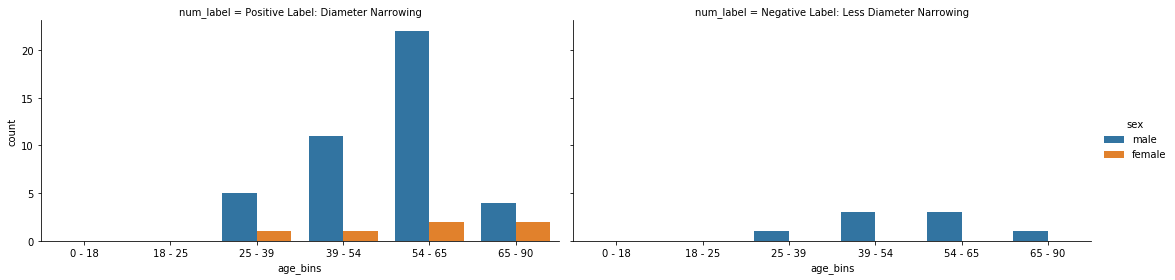

In [17]:
g = sns.catplot(x="age_bins", hue="sex", col="num_label",
                data=demo_df, kind="count",
                height=4, aspect=1.9);